# Statisticals Fundamentals

In this activity, students will code along with the instructor to get the opportunity to practice using statistical fundamentals to create a report for a group of stocks. The report will give a recommendation for each stock on whether it is over or under valued and more or less volatile than the market.

## Importing Required Modules

In [1]:
# Import modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

## Loading the Stocks Data

  - Each CSV file contains a stock's closing price and the date of the closing price.

  - Create a `Path` object for each CSV filepath.

In [2]:
# Set paths to CSV files
hd_csv_path = Path("../Resources/HD.csv")
intc_csv_path = Path("../Resources/INTC.csv")
mu_csv_path = Path("../Resources/MU.csv")
nvda_csv_path = Path("../Resources/NVDA.csv")
tsla_csv_path = Path("../Resources/TSLA.csv")
sp500_path = Path("../Resources/sp500.csv")

For each CSV file read the data into a `pandas` `DataFrame`.

  - Set the index column to be the date.

  - Infer the date time format.

  - Parse all dates when the CSV file is loaded.

In [3]:
# Read in CSV files
hd_df = pd.read_csv(
    hd_csv_path, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)
intc_df = pd.read_csv(
    intc_csv_path, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)
mu_df = pd.read_csv(
    mu_csv_path, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)
nvda_df = pd.read_csv(
    nvda_csv_path, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)
tsla_df = pd.read_csv(
    tsla_csv_path, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

sp500_df = pd.read_csv(
    sp500_path, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

## Coding Statistical Measures in Python

### Create a function named `calculate_mean`

   - Calculate mean should return the average value for a given `list` or `Series`.

   - $\mu = \frac{\sum{x_{i}}}{n}$

   - Choose a function name that will not conflict with any modules that may have been imported.

In [4]:
# Create a function named 'calculate_mean'.
def calculate_mean(data_set):
    sum = 0
    length = 0
    for value in data_set:
        sum = sum + value
        length = length + 1
    result = sum / length
    return result

In [5]:
# Test the `calculate_mean` function
data = [1, 2, 3, 4, 5]
print(calculate_mean(data))

3.0


### Create a function named `calculate_variance`
   - Variance is the squared average change around the mean.

   - ${S}^2 = \frac{\sum{ (x_{i} - \mu })^{2}}{ n - 1}$


In [6]:
# Create a function named 'calculate_variance'.
def calculate_variance(data_set):
    sum = 0
    length = 0
    mean_value = calculate_mean(data_set)
    for value in data_set:
        sum = sum + (value - mean_value) ** 2
        length = length + 1
    result = sum / (length - 1) 
    return result

In [7]:
# Test the `calculate_variance` function
data = [1, 2, 3, 4, 5]
print(calculate_variance(data))

2.5


### Create a function named `calculate_standard_deviation`

 - The standard deviation is the square root of the variance.

 - $\sigma = \sqrt{S^{2}}$

In [8]:
# Create a function named 'calculate_standard_deviation'.
def calculate_standard_deviation(data_set):
    return (calculate_variance(data_set)) ** (1 / 2)

In [9]:
# Test the `calculate_standard_deviation` function
data = [1, 2, 3, 4, 5]
print(calculate_standard_deviation(data))

1.5811388300841898


## Coding Helper Functions

### Create a function named `check_value`

   - The function should compare the most recent price of the asset to it's mean price.

   - If the most recent price is greater than the mean price the asset is over-valued.

   - If the most recent price is under than the mean price the asset is under-valued.

   - If neither case is true then the most recent price must be at the mean price.

In [10]:
# Create a function to check to most recent price against the mean price to determine if the stock is overvalued.
def check_value(current_price, mean_price):
    if current_price > mean_price:
        print("Overvalued")
    elif current_price < mean_price:
        print("Undervalued")
    else:
        print("Price is at mean value.")

### Create a function named `compare_volatility`
   
   - The function should compare the standard deviation of an assets price change percentage to a market's.

   - If the asset's standard deviation is greater than the market's the stock is more volatile otherwise it's less volatile.

In [11]:
# Create a function to compare the volatility with the underlying market
def compare_volatility(stock_std, market_std):
    if stock_std > market_std:
        print("The stock is more volatile than the market.")
    else:
        print("The stock is less volatile than the market.")

## Coding the Stocks Report

### Calculate the Daily Percent Change for the SP500

In [12]:
# Calculate the daily percent changes for sp500 and drop n/a values
sp500_df["pct_change"] = sp500_df["close"].pct_change()
sp500_df = sp500_df.dropna()
sp500_df.head()

,close,pct_change
date,,
2014-05-21,1888.03,0.008116
2014-05-22,1892.49,0.002362
2014-05-23,1900.53,0.004248
2014-05-27,1911.91,0.005988
2014-05-28,1909.78,-0.001114


## Calculate the Standard Deviation for the SP500

In [13]:
# Calculate the standard deviation for the sp500
sp500_std = calculate_standard_deviation(sp500_df["pct_change"])
print(sp500_std)

0.008386473841433477


### Create a Python Dictionary of Stocks to Run the Report On
   
   - Map each stock name to it's dataframe

   - Do not include the SP500

   - Example: stocks_to_check = {"stock_name" : stock_df}

In [14]:
# Create a dictionary for all stocks except the sp500
stocks_to_check = {
    "Home Depot": hd_df,
    "Intel": intc_df,
    "Micron Tech.": mu_df,
    "NVIDIA": nvda_df,
    "Tesla": tsla_df,
}

### Generate the Report

  - Loop through the dictionary of stocks.

  - **Hint**: Use the `items()` method for dictionaries. You can read more on the [documentation page](https://docs.python.org/3/tutorial/datastructures.html#looping-techniques).

  - For each stock:
    * Calculate the daily percent change.
    * Get the most recent price.
    * Calculate the mean and standard deviation using the functions you created.
    * Print the stock's name.
    * Print the statistics that you calculated.
    * Using `check_value` see if the stock is over or under valued.
    * Using `compare_volatility` check if the stock is more or less volatile than the SP500
    * Plot a box plot of the daily percent change

Home Depot

Recent Price Pct: -0.0015496534802634798
Mean Price Pct: 0.0005143162010646481
Price Pct std. deviation: nan
Undervalued
The stock is less volatile than the market.


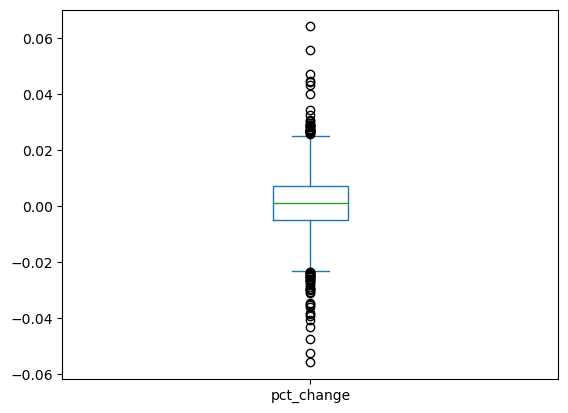



Intel

Recent Price Pct: -0.0015496534802634798
Mean Price Pct: 0.0005143162010646481
Price Pct std. deviation: nan
Undervalued
The stock is less volatile than the market.


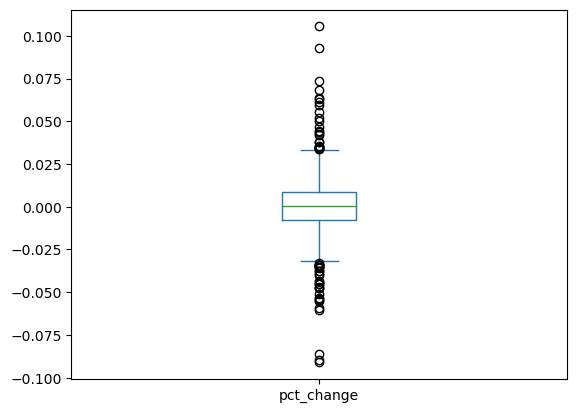



Micron Tech.

Recent Price Pct: -0.0015496534802634798
Mean Price Pct: 0.0005143162010646481
Price Pct std. deviation: nan
Undervalued
The stock is less volatile than the market.


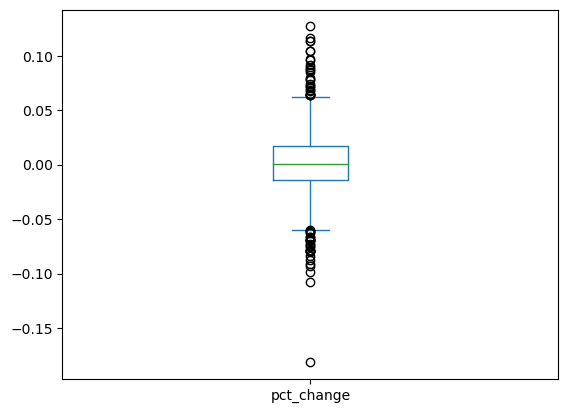



NVIDIA

Recent Price Pct: -0.0015496534802634798
Mean Price Pct: 0.0005143162010646481
Price Pct std. deviation: nan
Undervalued
The stock is less volatile than the market.


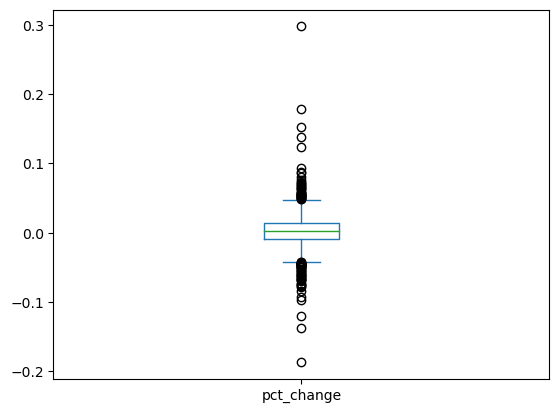



Tesla

Recent Price Pct: -0.0015496534802634798
Mean Price Pct: 0.0005143162010646481
Price Pct std. deviation: nan
Undervalued
The stock is less volatile than the market.


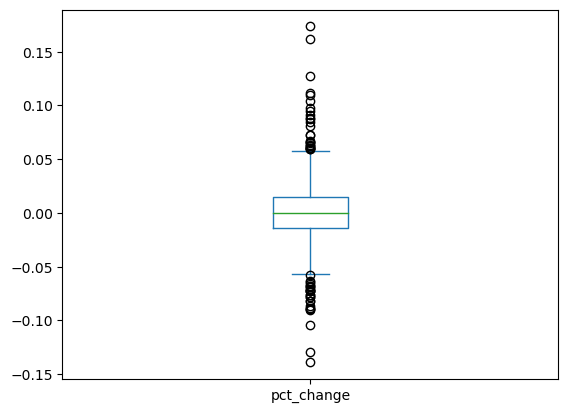

In [20]:
# Loop through the stocks in the dictionary and compare their performance with the sp500.
for stock_name, dataframe in stocks_to_check.items():

    # Calculate the daily percent change for each stock
    

    # Get most recent price stock_recent_price = 

    # Calculate the mean price percent change stock_mean = 
    

    # Calculate the standard deviation of the percent change stock_std = 
    

    # Print the stock name and calculated statistics
    print(f"{stock_name}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")

    # Using check_value, check if the stock is overvalued or not
    
    # Compare the stock's volatility with the market
    
    